<a href="https://colab.research.google.com/github/SurekhaBerlin/Python/blob/main/Electric_Car_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELECTRIC VEHICLE DATA ANALYSIS

## STEP 1: Importing Libraries

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 2: Reading the Data

In [120]:
data = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")

## STEP 3: Data Exploring

In [182]:
data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [122]:
data.shape

(150482, 17)

In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,150479.0,9.816834e+04,2.473612e+03,1.730000e+03,9.805200e+04,9.812200e+04,9.837000e+04,9.957700e+04
Model Year,150482.0,2.020005e+03,3.015209e+00,1.997000e+03,2.018000e+03,2.021000e+03,2.023000e+03,2.024000e+03
Electric Range,150482.0,6.787784e+01,9.623001e+01,0.000000e+00,0.000000e+00,1.800000e+01,9.700000e+01,3.370000e+02
Base MSRP,150482.0,1.312645e+03,9.231310e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,150141.0,2.934395e+01,1.482483e+01,1.000000e+00,1.800000e+01,3.300000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,150482.0,2.111122e+08,8.196388e+07,4.385000e+03,1.693473e+08,2.150306e+08,2.399119e+08,4.792548e+08
2020 Census Tract,150479.0,5.297195e+10,1.638841e+09,1.081042e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


In [124]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

## STEP 4: Data Analysis

In [125]:
count_by_county = data["County"].value_counts()
count_by_county.to_csv("count_by_county.csv")

In [126]:
count_by_county.head(10)

,count
County,
King,79075
Snohomish,17307
Pierce,11542
Clark,8855
Thurston,5403
Kitsap,4923
Spokane,3690
Whatcom,3668
Benton,1801


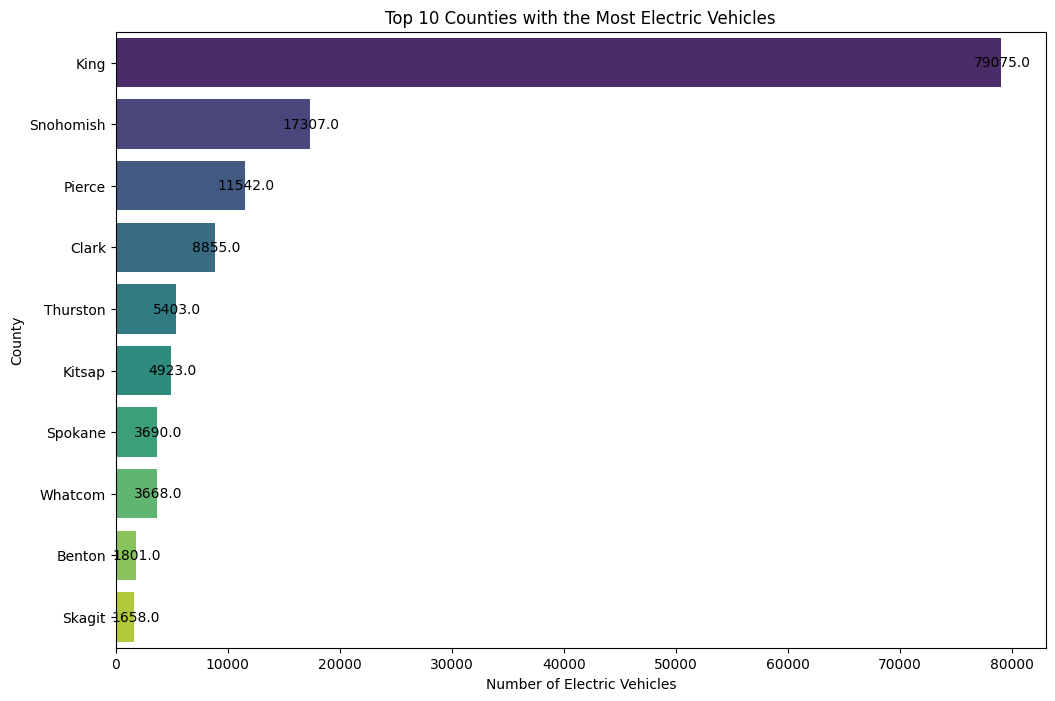

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Calculate the number of vehicles per county
county_counts = data['County'].value_counts()

# Get the top 10 counties
top_10_counties = county_counts.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_counties.values, y=top_10_counties.index,legend = False,hue=top_10_counties.index, palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

plt.title('Top 10 Counties with the Most Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()


In [128]:
count_by_city = data["City"].value_counts()
count_by_city.to_csv("count_by_city.csv")

In [129]:
count_by_city.head(10)

,count
City,
Seattle,25675
Bellevue,7691
Redmond,5502
Vancouver,5310
Bothell,4861
Kirkland,4622
Sammamish,4436
Renton,4043
Olympia,3634


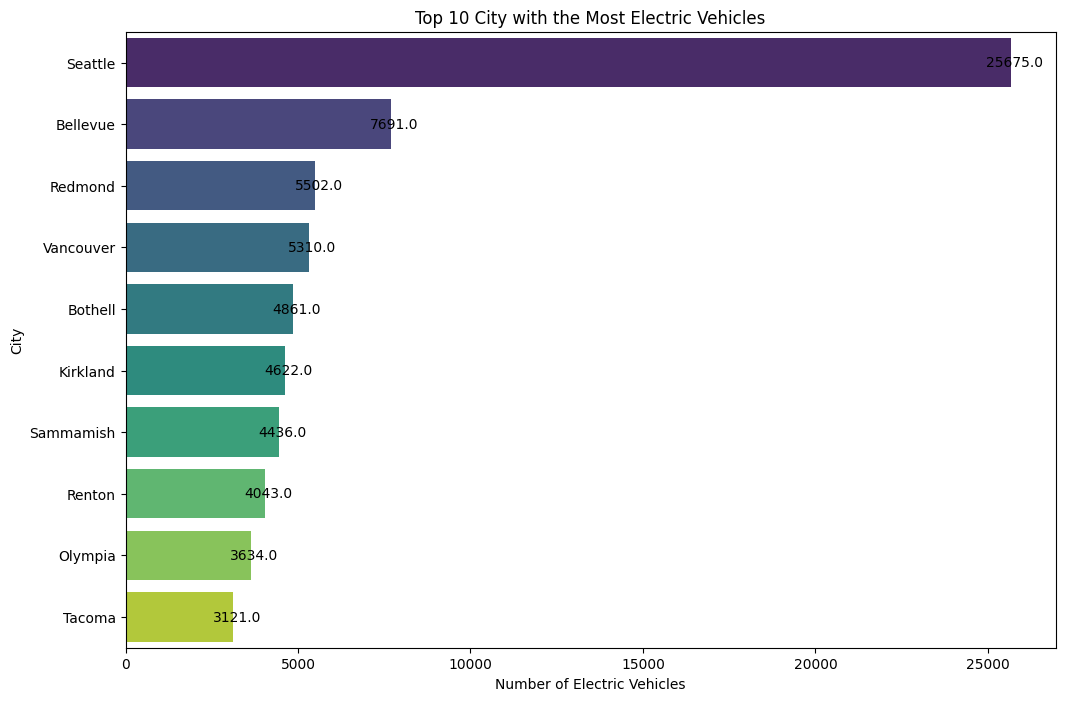

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Calculate the number of vehicles per county
city_counts = data['City'].value_counts()

# Get the top 10 counties
top_10_cities = city_counts.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_cities.values, y=top_10_cities.index,legend = False,hue=top_10_cities.index, palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

plt.title('Top 10 City with the Most Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()

In [172]:
count_by_state = data["State"].value_counts()
count_by_state.to_csv("count_by_state.csv")

In [173]:
count_by_state .head(10)

,count
State,
WA,150141
CA,92
VA,35
MD,33
TX,20
NC,13
IL,12
AZ,11
CO,11


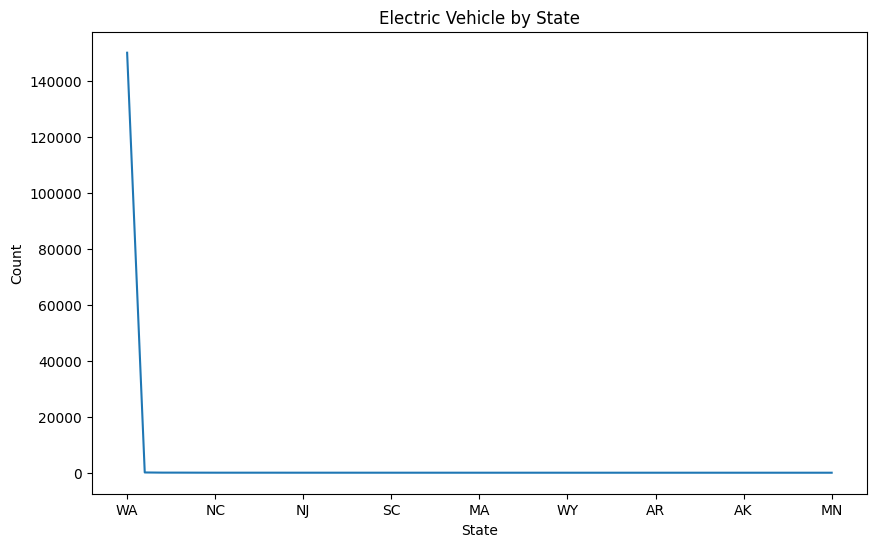

In [181]:
plt.figure(figsize=(10, 6))
count_by_state.plot(kind='line')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Electric Vehicle by State")
plt.show()

In [146]:
count_by_ModelYear = data["Model Year"].value_counts()
count_by_ModelYear.to_csv("count_by_ModelYear.csv")

In [147]:
count_by_ModelYear.head(10)

,count
Model Year,
2023,37079
2022,27799
2021,18684
2018,14441
2020,11294
2019,10717
2017,8574
2016,5650
2015,4934


<ipython-input-148-7d38a03bf8a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_model_years.index, y=top_10_model_years.values,legend = 'False', palette=sns.color_palette('viridis', len(top_10_model_years)))


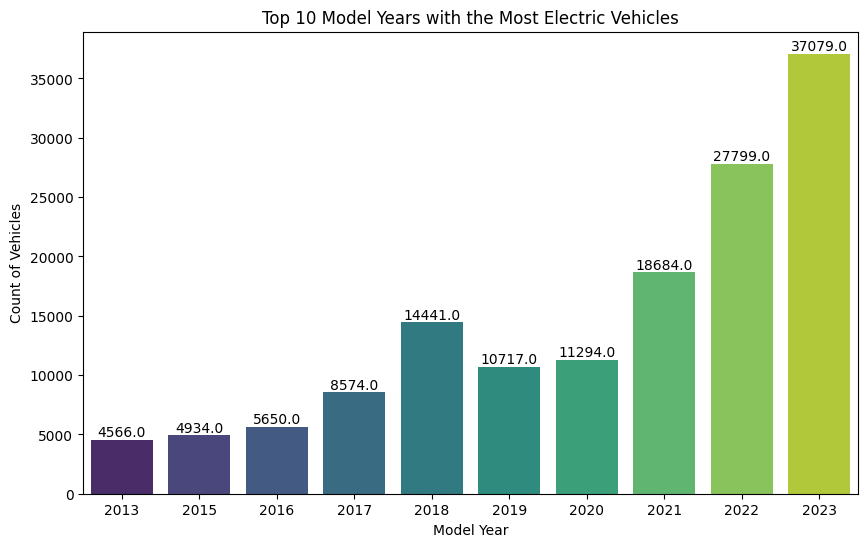

In [148]:
# Calculate the number of vehicles per model year
count_by_ModelYear = data['Model Year'].value_counts().sort_index()

# Sort the counts in descending order and select the top 10
top_10_model_years = count_by_ModelYear.sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn with the 'viridis' color palette
sns.barplot(x=top_10_model_years.index, y=top_10_model_years.values,legend = 'False', palette=sns.color_palette('viridis', len(top_10_model_years)))

# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom',
                color='black', fontsize=10)

# Set labels and title
plt.xlabel("Model Year")
plt.ylabel("Count of Vehicles")
plt.title("Top 10 Model Years with the Most Electric Vehicles")

# Show plot
plt.show()

In [149]:
count_by_Model = data["Model"].value_counts()
count_by_Model.to_csv("count_by_Model.csv")

In [150]:
count_by_Model.head(10)

,count
Model,
MODEL Y,28502
MODEL 3,27709
LEAF,13187
MODEL S,7611
BOLT EV,5733
MODEL X,5114
VOLT,4890
ID.4,2999
NIRO,2876


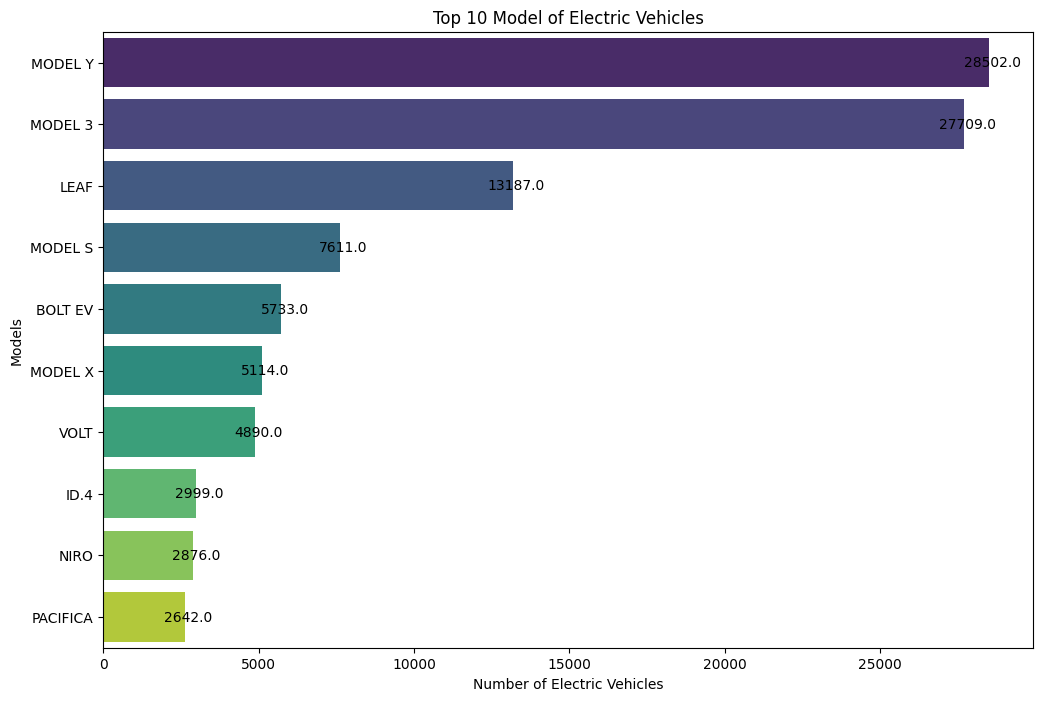

In [153]:
# Get the top 10 counties
top_10_models = count_by_Model.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_models.values, y=top_10_models.index,legend = False,hue=top_10_cities.index, palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

plt.title('Top 10 Model of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Models')
plt.show()

In [154]:
count_by_Make = data["Make"].value_counts()
count_by_Make.to_csv("count_by_Make.csv")

In [155]:
count_by_Make.head(10)

,count
Make,
TESLA,68983
NISSAN,13497
CHEVROLET,12026
FORD,7614
BMW,6439
KIA,6198
TOYOTA,5223
VOLKSWAGEN,4074
VOLVO,3536


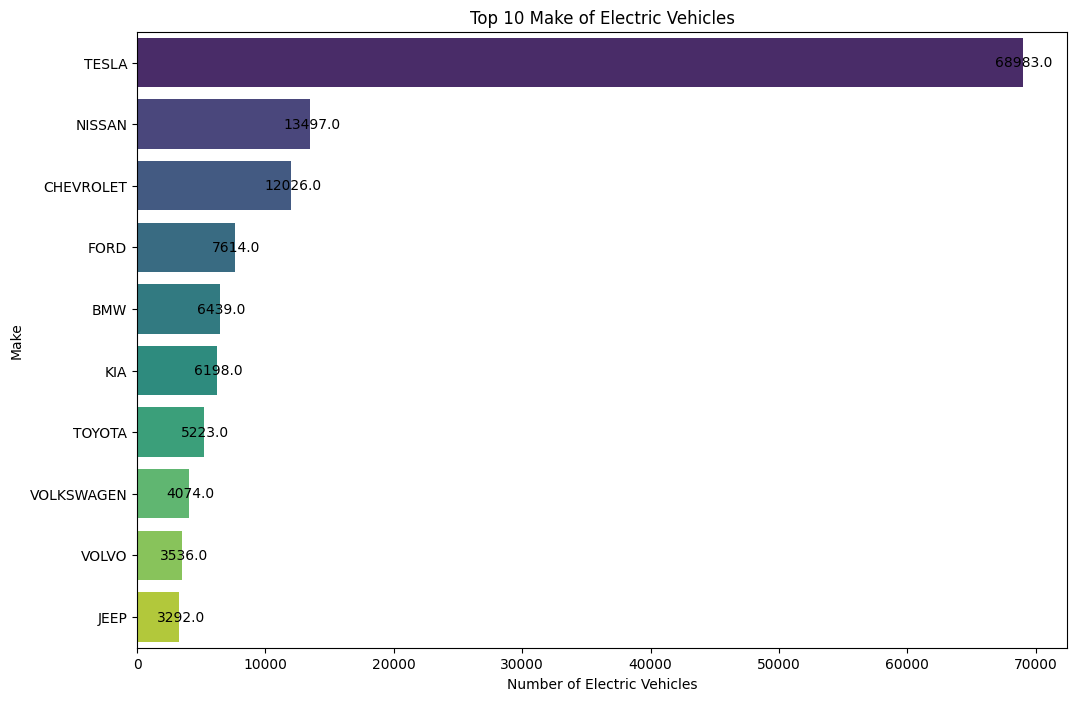

In [163]:
# Get the top 10 counties
top_10_make = count_by_Make.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_make.values, y=top_10_make.index,legend = False,hue=top_10_make.index, palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

plt.title('Top 10 Make of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Make')
plt.show()

In [165]:
count_by_Vehicle_Type  = data["Electric Vehicle Type"].value_counts()
count_by_Vehicle_Type .to_csv("count_by_Vehicle_Type .csv")

In [171]:
count_by_Vehicle_Type

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),116807
Plug-in Hybrid Electric Vehicle (PHEV),33675


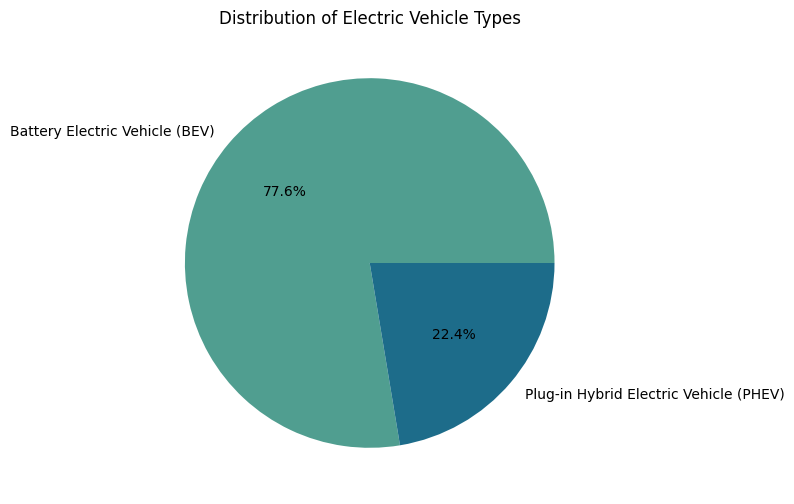

In [170]:
# Calculate the number of vehicles by type
count_by_Vehicle_Type = data['Electric Vehicle Type'].value_counts()

# Save the data to a CSV file
count_by_Vehicle_Type.to_csv("count_by_Vehicle_Type.csv", header=True)

# Plotting the pie chart
plt.figure(figsize=(8, 6))

# Create a color palette with enough colors for the pie chart
colors = sns.color_palette('crest', len(count_by_Vehicle_Type))

# Create a pie chart
plt.pie(count_by_Vehicle_Type, labels=count_by_Vehicle_Type.index, autopct='%1.1f%%', colors=colors)

# Set title
plt.title("Distribution of Electric Vehicle Types")

# Show the plot
plt.show()

In [183]:
count_by_Electric_Range = data["Electric Range"].value_counts()
count_by_Electric_Range.to_csv("count_by_Electric_Range.csv")

In [184]:
count_by_Electric_Range.head(5)

,count
Electric Range,
0,69698
215,6490
220,4125
84,4023
238,3611
